In [ ]:
!pip install pyod  

     |████████████████████████████████| 111 kB 5.2 MB/s 
  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130726 sha256=c6847049c45c0d4ce1047a1a689204103ec7203cd65e35f4e1a9b22f50e432cf
  Stored in directory: /root/.cache/pip/wheels/50/32/84/d64079e8bf087c1b231c9beecfa9abc08592ab5f5f333124cd
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
df = pd.read_excel("Sample - Superstore.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

### 1. EDA
#### 1.1 Distribution of Sales

In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

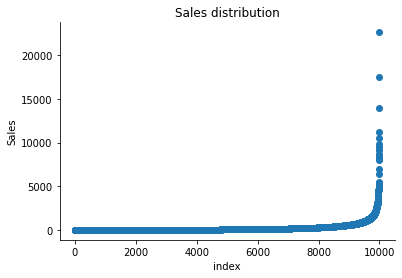

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


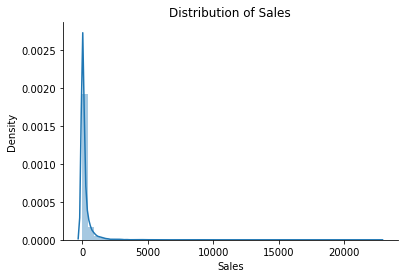

In [ ]:
sns.distplot(df['Sales'])
plt.title('Distribution of Sales')
sns.despine()

In [ ]:
print(f"Skewness: {df['Sales'].skew()}")
print(f"Kurtosis: {df['Sales'].kurt()}")

Skewness: 12.972752341816228
Kurtosis: 305.31175324682283


#### 1.2 Distribution of Profit

In [ ]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

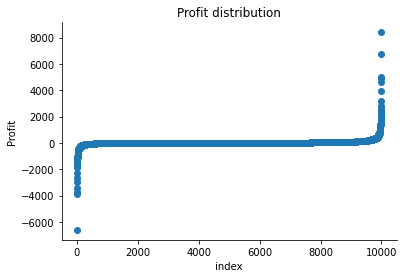

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


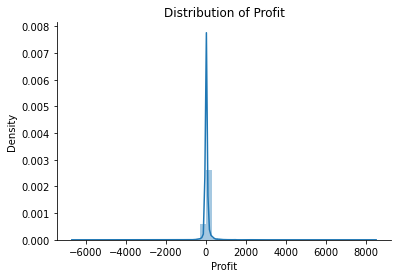

In [ ]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


### 2. Aomaly Detection on Sales data

In [ ]:
from pyod.models.iforest import IForest

isolation_forest = IForest(n_estimators=100, contamination=0.1)
isolation_forest.fit(df['Sales'].values.reshape(-1,1))
query_data = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(query_data)
outlier = isolation_forest.predict(query_data)

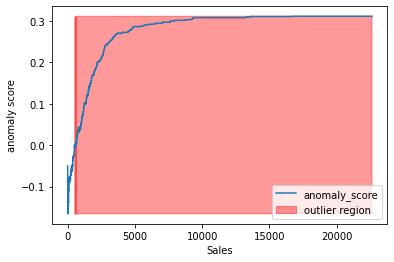

In [ ]:
plt.plot(query_data, anomaly_score, label='anomaly_score')
plt.fill_between(query_data.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==1, 
                 color='r', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

### 3. Anomaly Detection on Sales Data

In [ ]:
from pyod.models.iforest import IForest
isolation_forest = IForest(n_estimators=100, contamination=0.1)
isolation_forest.fit(df['Profit'].values.reshape(-1,1))
query_data = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(query_data)
outlier = isolation_forest.predict(query_data)

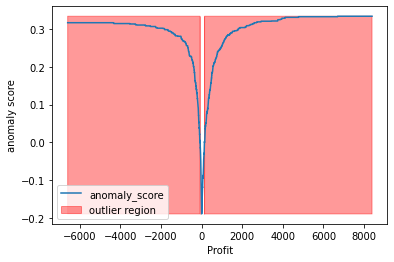

In [ ]:
plt.plot(query_data, anomaly_score, label='anomaly_score')
plt.fill_between(query_data.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==1,
                 color='r', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

### 4. Anomaly Detection using Multi Variate 

In [ ]:
X = df[['Sales', 'Profit']]
X.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [ ]:
from pyod.models.iforest import IForest
isolation_forest = IForest(n_estimators=100)
isolation_forest.fit(X)
sales_query = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
profit_query = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
query_data = np.hstack([sales_query, profit_query])
anomaly_score = isolation_forest.decision_function(query_data)
outlier = isolation_forest.predict(query_data)

In [ ]:
outlier

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
list(outlier).count(1)

9994